<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Stochastic-Dynamic-Programming-(with-Markov-Chains)" data-toc-modified-id="Stochastic-Dynamic-Programming-(with-Markov-Chains)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Stochastic Dynamic Programming (with Markov Chains)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-Big-Picture:" data-toc-modified-id="The-Big-Picture:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>The Big Picture:</a></span></li></ul></li><li><span><a href="#Exercise-0-(Simulating-a-Markov-Chain)" data-toc-modified-id="Exercise-0-(Simulating-a-Markov-Chain)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercise 0 (Simulating a Markov Chain)</a></span><ul class="toc-item"><li><span><a href="#Answer-0.1" data-toc-modified-id="Answer-0.1-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Answer 0.1</a></span></li><li><span><a href="#Answer-0.2" data-toc-modified-id="Answer-0.2-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Answer 0.2</a></span></li><li><span><a href="#Answer-0.3" data-toc-modified-id="Answer-0.3-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Answer 0.3</a></span></li></ul></li><li><span><a href="#Exercise-1-(Labor-Market-and-Markov-Chain)" data-toc-modified-id="Exercise-1-(Labor-Market-and-Markov-Chain)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercise 1 (Labor Market and Markov Chain)</a></span></li><li><span><a href="#Exercise-2-(Politics)" data-toc-modified-id="Exercise-2-(Politics)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exercise 2 (Politics)</a></span></li><li><span><a href="#Exercise-3-(Prelude)" data-toc-modified-id="Exercise-3-(Prelude)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exercise 3 (Prelude)</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exercise 3</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Answer-3.1" data-toc-modified-id="Answer-3.1-1.5.0.1"><span class="toc-item-num">1.5.0.1&nbsp;&nbsp;</span>Answer 3.1</a></span></li><li><span><a href="#Answer-3.2" data-toc-modified-id="Answer-3.2-1.5.0.2"><span class="toc-item-num">1.5.0.2&nbsp;&nbsp;</span>Answer 3.2</a></span></li><li><span><a href="#Answer-3.3" data-toc-modified-id="Answer-3.3-1.5.0.3"><span class="toc-item-num">1.5.0.3&nbsp;&nbsp;</span>Answer 3.3</a></span></li><li><span><a href="#Remarks" data-toc-modified-id="Remarks-1.5.0.4"><span class="toc-item-num">1.5.0.4&nbsp;&nbsp;</span>Remarks</a></span></li><li><span><a href="#Further-discussion" data-toc-modified-id="Further-discussion-1.5.0.5"><span class="toc-item-num">1.5.0.5&nbsp;&nbsp;</span>Further discussion</a></span></li><li><span><a href="#Answer-1.3-(continued:-calibration-of-model-parameters)" data-toc-modified-id="Answer-1.3-(continued:-calibration-of-model-parameters)-1.5.0.6"><span class="toc-item-num">1.5.0.6&nbsp;&nbsp;</span>Answer 1.3 (continued: calibration of model parameters)</a></span></li><li><span><a href="#Answer-3.4" data-toc-modified-id="Answer-3.4-1.5.0.7"><span class="toc-item-num">1.5.0.7&nbsp;&nbsp;</span>Answer 3.4</a></span></li><li><span><a href="#Answer-3.5" data-toc-modified-id="Answer-3.5-1.5.0.8"><span class="toc-item-num">1.5.0.8&nbsp;&nbsp;</span>Answer 3.5</a></span></li><li><span><a href="#Answer-3.6" data-toc-modified-id="Answer-3.6-1.5.0.9"><span class="toc-item-num">1.5.0.9&nbsp;&nbsp;</span>Answer 3.6</a></span></li></ul></li></ul></li><li><span><a href="#Exercise-4-(Homework)" data-toc-modified-id="Exercise-4-(Homework)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Exercise 4 (Homework)</a></span></li><li><span><a href="#Exercise-5-(Homework)" data-toc-modified-id="Exercise-5-(Homework)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Exercise 5 (Homework)</a></span></li><li><span><a href="#Exercise-6-(Homework)" data-toc-modified-id="Exercise-6-(Homework)-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Exercise 6 (Homework)</a></span></li></ul></li></ul></div>

# Stochastic Dynamic Programming (with Markov Chains)

Author: [MachinaFantasma](https://github.com/phantomachine) | [Twitter](https://twitter.com/machinafantasma)

In [21]:
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.interpolate as interpolate
from IPython.display import IFrame

In [22]:
# Show figure output within notebook (inline)
%matplotlib inline

**Key Learning Points**

1. Extend previous lessons on deterministic dynamic programming (DDP) to stochastic dynamic programming (SDP)

2. Exogenous source(s) of randomness in decision environments: Focus on finite-state-space and time-invariant Markov chains

2. Nonlinear solution methods for models with risky decision environments
    * Function Approximation: Projecting onto family of known continuous basis functions (linear interpolation example)
    
    * Solving Bellman operator: Modified to incorporate (exogenous) Markov Chain random variables

3. Solving a basic example of *stochastic* optimal growth model.

    * Exploiting the Fundamental Welfare Theorems: Solving Recursive Competitive Equilibrium (RCE) as a Pareto Planning Problem and then finding RCE pricing functions indirectly, given planner's optimal allocation functions.

4. RBC model as template for other models (useful for monetary and fiscal policy)

    * Same rod, line and tackle, different fish. Same brain, different problem.




### The Big Picture:

**Framework**. In this tutorial, we want to consider SDP problems of the form:
$$
    V(x,z) = \max_{x' \in \Gamma(x,z)} 
                    \left\{ 
                        U(x,x_{+1},z) + \beta \mathbb{E} \left[ V(x_{+1}, z_{+1}) | (x,z) \right]
                    \right\}
$$
where:
* $U$ is a known per-period or flow payoff function
* $(x,z) \in X \times Z$ is a pair of, respectively, endogenous and exogenous state variables. (They can be vector valued.)
* $\Gamma: X \times Z \rightarrow 2^{X}$ is a feasible choice correspondence.
* $\mathbb{E}[\cdot | (x,z)]$ is the linear expectations operator, conditional on observed states $(x,z)$. Sometimes, if the information set generated by $(x,z)$ is understood in a problem, writers use the short-hand notation $\mathbb{E}_{t}[\cdot]$ instead.

We are solving for (approximately optimal) nonlinear value and policy functions---we will restrict attention to a special structure describing the exogenous stochastic process of the random variable $z$. We'll describe it as a (time-homogenous) Markov Chain, so the expectations operator $\mathbb{E}[\cdot | (x,z)]$ will be replaced by a weighted summation operator, where the weights are the conditional/transition probabilities of the Markov Chain's *stochastic/Markov matrix*. In general, the calculation of expected values will involve integration, and, numerical (quadrature-based or Monte-Carlo) integration in practice. 

Like before with DDP, our objective is to find the unknowns:

* Value function (optimal or indirect total payoff/reward function), $V: X \times Z \rightarrow \mathbb{R}$.

* Policy function (describing optimal behavior), $g: X \times Z \rightarrow X$, where $g$ is the solution that supports or yields the value $V(x,z)$ at any state $(x,z)$.

Given $g$ we can recursively construct an optimal (or equilibrium, if we're talking about a market solution) trajectory of the model economy.

**Remark 1**. What allows us to still apply Bellman's Principle of Optimality in the face of random perturbations to the decision model is that preferences have the expected utility representation. (If you recall from your Microeconomics class, this implies that payoffs are linear in the space of probability distributions.) This allows us to apply the *law of iterated expectations* (you'd have learned this in basic stats or econometrics) in a Markovian setting (our shocks are Markov), and therefore, the decision maker's continuation value is linear in (conditional) probabilities. 

**Remark 2**. There are recent generalizations to models where the expected utility representation fails---i.e., models where agents are averse to uncertainty in their model; think about environmental (monetary) policy where there is plenty of debate about what is the correct model of global warming (inflation/unemployment) dynamics and their effects on the economy.

**Applications**. You will see that many single-decision-maker's SDP have this structure:

* The asset/saving and consumption problem with risky endowment flows

* A monopolist (maximizing intertemporal expected profits) deciding on optimal pricing of electricity over time, but the demand curve it faces is stochastic: There are random shifts in the demand for electricity

* An oil company deciding how much and when to extract an oil reserve and market conditions are stochastic

* A business deciding on capital investment when production (or revenue) is subject to shocks

* An unemployed worker deciding whether to look for jobs (or accept a job offer) 

* A student deciding to skip class, readings, and problem sets each week where the difficulty of the final exam is a random variable

**Mantra of the week**: Same toolkit, different problems. Let's work on a few familiar examples here.

Here's a fun video about the [origins of Markov Chains](https://youtu.be/Ws63I3F7Moc) ...

In [23]:
IFrame(src="https://www.youtube.com/embed/Ws63I3F7Moc", width="560", height="315")

## Exercise 0 (Simulating a Markov Chain)

Consider a Markov Chain $(\mu_{0}, P)$, where $\mu_{0}$ is its initial unconditional distribution over the state space $Z$ which is a finite set. $P$ is the Markov matrix. The code cell immediately below gives you a function that simulates a sample trajectory of the Markov chain.

Let
$$
    P = \left[
            \begin{matrix}
            .5    & .5
             \\
            .075  & .925
            \end{matrix}
        \right].
$$

represent the transition probability (i.e., Markov/stochastic) matrix of an income/endowment process of an agent. Without loss assume a uniform initial distribution, $\mu_{0} = (0.5, 0.5)$ over the state space $Z := \{ 0.1, 100 \}$. 

1. What is the probability of observing a sample path $(z_{0}, z_{1}, z_{2}, z_{3}, z_{4}) = (0.1, 0.1, 100, 100, 0.1)$?

2. Recall that we can show: $\mu_{t} = \mu_{0}P^{t}$? Plot the unconditional distribution of the Markov chain at

    * $t = 0$
    
    * $t = 1$
    
    * $t = 10$
    
    * $t = 300$
    
    * $t = 10000$

3. Simulate a realization of the Markov chain for $T=10000$ periods. Count the frequency of observations of each outcome, i.e., each realized state. Comment on your answer and compare with your theoretical calculation from the last part.
    

In [24]:
import numpy as np

def pick(Z, q):
    """Pick an element without replacement from vector Z 
    with given probability distribution q on Z"""
    return np.random.choice(Z, replace=False, p = q)

def mclongtam(Z, P, mu, T):
    """Simulate T-length observations of Markov chain (mu,P)"""
    """Note: Finite state space Z admit integers or reals"""
    data = np.empty(T)
    data[0] = pick(Z, mu)
    for t in range(T-1):
        # Find index/location of element in Z with value data[t]
        state = Z.tolist().index(data[t])
        # Given state index, draw new state from conditional distro
        data[t+1] = pick(Z, P[state, :])         
    return data   

### Answer 0.1

The likelihood of observing this sample path is:
 $$
     \begin{split}
     \Pr\{ \{0.1\} \cap \{0.1\} \cap \{100\} \cap \{100\} \cap \{0.1\} \} 
     & = \mu_{0}(1) \times P(1,1) \times P(1,2) \times P(2,2) \times P(2,1)
     \\
     & = 0.5 \times 0.5 \times 0.5 \times 0.925 \times 0.075
     \end{split}
 $$
 Let's use the notebook to calculate this for us. First we define the Markov chain $(\mu, P)$ on the state space $Z$:

In [25]:
# Markov Chain's state space
Z = np.array(([0.1, 100.0]))
# Markov matrix
P = np.array(([0.5, 0.5], [0.075, 0.925]))
# Initial unconditional distro
mu = np.array(([0.5, 0.5]))

OK, so the likelihood of said sample is:

In [26]:
likelihood = mu[0] * P[0,0] * P[0,1] * P[1,1] * P[1,0]
print("The likelihood of sample is = %0.3g" %(likelihood))

The likelihood of sample is = 0.00867


### Answer 0.2

In [27]:
# Show figure output within notebook (inline)
% matplotlib inline
# Import plotting tools
import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


Then we calculate and plot the snapshots of unconditional distributions.

/var/folders/jj/c3rnssjx7dnb2tt1t9xy4vk80000gn/T/ipykernel_19512/4040561605.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows, ncols, t+1)


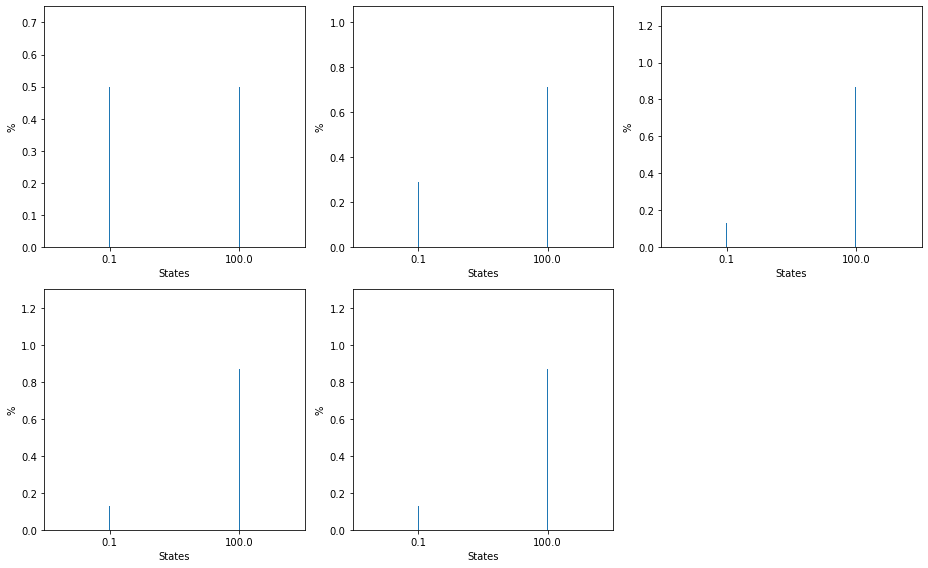

Unconditional distribution t = 10000 periods ahead: 
mu(z = 0.1) = 0.13
mu(z = 100) = 0.87


In [28]:
# Choose dates to take a souvenir photo
snapshots = np.array(([0, 1, 10, 30, 10000]))
# Make sure your photo album has enough slots
NumberSnaps = snapshots.size
distro = np.empty((NumberSnaps, mu.size))
# Set dimension for auto subplotting
ncols = 3
nrows = (NumberSnaps + np.mod(NumberSnaps, ncols)) / ncols
# Loop over calculations and plot simultaneously
fig = plt.figure(facecolor='white',figsize=(13,8))
for t, date in enumerate(snapshots):
    # Raise P to power date
    Ppow = np.linalg.matrix_power(P,date)
    # Unconditional distro
    distro[t,:] = mu @ Ppow
    # Output subplot t (counts from 1)
    plt.subplot(nrows, ncols, t+1)
    plt.bar(Z, distro[t,:])
    plt.xticks(Z)
    plt.margins(0.5)
    plt.tight_layout()
    plt.xlabel('States')
    plt.ylabel('%')
plt.show()

print("Unconditional distribution t = %i periods ahead: " % (snapshots[-1])) 
print("mu(z = 0.1) = %4.3g\nmu(z = 100) = %4.3g" %(distro[-1,0], distro[-1,1]))

*Remark*: Observe that the unconditional distributions $\mu_{t}$ eventually become constant. The relative frequences of observations of the realization of each state eventually converge to the same constant proportions. This is an example of an ergodic Markov chain.

Another way to think about the stationary distribution (the long run distribution) of this Markov chain is as follows: The Markov matrix $P$ is a linear operator that maps from the set of distributions on $Z$ into itself: $P: \Delta(Z) \rightarrow \Delta(Z)$. If $\mu_{\infty}$ is a stationary distribution of the Markov chain $(\mu_{0}, P)$, then it must satisfy the linear algebra problem:

$$
    (P - \mathbf{I})\mu_{\infty} = \mathbf{0},
$$

where $\mathbf{I}$ is the indentity matrix conformable to $P$ and $\mathbf{0}$ is a vector of zeros (null vector). In other words, $\mu_{\infty}$ is a right eigenvector of $P$ associated with a unit eigenvalue.

Here's a code for solving for $\mu_{\infty}$, given $P$:



In [29]:
def ErgodistMC(P):
    """Compute stationary distribution of an ergodic Markov Chain"""
    N_state = P.shape[0]
    z = np.zeros(N_state)
    z[-1] = 1.0
    PMI = P - np.eye(N_state)
    PMI[:,-1] = np.ones(N_state)
    lambda_inf = np.linalg.solve(PMI.T,z.T)
    return lambda_inf

And its usage:

In [30]:
mu = ErgodistMC(P)
print(mu)

[0.13043478 0.86956522]


Notice how these numbers are almost the same as the one compute by recursion on the linear operator $P$ to get a sequence of unconditional distributions of the Markov chain for long enough?

### Answer 0.3

In [31]:
# Sample length
T = 10000
# Generate sample path
chain = mclongtam(Z,P,mu,T)

Let's plot the sample path over time. But we won't see much if we plot everything. So let's plot just the last 30 observations of the $T$-length path:

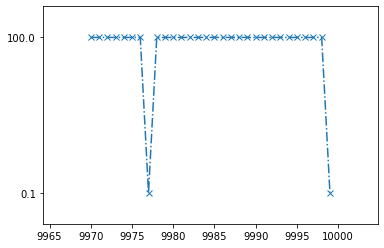

In [32]:
dates = np.arange(T-30,T)
plt.plot(dates, chain[(T-30):T], '-.x')
plt.yticks(Z)
plt.margins(0.2)
plt.show()

Let's count the frequency of realizations of each state, and plot the sample distribution:

1372/10000 (13.7 percent) frequency of obs. z =   0.10
8628/10000 (86.3 percent) frequency of obs. z = 100.00


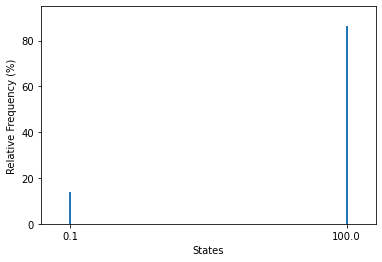

In [33]:
# the histogram of the data
#n, bins, patches = plt.hist(chain, Z.size, normed=0, facecolor='green', alpha=0.5)
#plt.show()
#plt.plot(bins, chain, 'r--')
# Calculate relative frequencies
outcome1 = chain[chain == Z[0]] 
count1 = outcome1.size
freq1 = count1*100.0/float(T)
outcome2 = chain[chain == Z[1]] 
count2 = outcome2.size
freq2 = count2*100.0/float(T)
print("%i/%i (%0.3g percent) frequency of obs. z = %6.2f" \
              % (count1, T, freq1, Z[0])) 
print("%i/%i (%0.3g percent) frequency of obs. z = %6.2f" \
              % (count2, T, freq2, Z[1])) 
# Plot empirical distribution
plt.bar(Z, np.array(([freq1, freq2])))
plt.xticks(Z)
plt.margins(0.1)
plt.xlabel('States')
plt.ylabel('Relative Frequency (%)')
plt.show()

## Exercise 1 (Labor Market and Markov Chain)

**Undergraduate Bathtub Model**. Suppose the long-run labor force of an economy is constant given by $\bar{L} \equiv 1$. The variables $E_{t}$ and $U_{t}$, respectively, denote rates of employment and unemployment. For each date $t \geq 0$, the model says:
$$
E_{t}+U_{t} = \bar{L},
$$
and,
$$
U_{t+1}=sE_{t}+(1-f)U_{t},
$$
where $0 < f< 1$ is the job finding probability of an individual, and, $0 < s < 1$ is the probability that an existing match between a job and a worker gets destroyed.

1. Show that this first-year undergraduate model of unemployment can be represented as a Markov Chain. What is the chain's state space? What is the Markov matrix? Depict its automaton representation.

2. The Markov chain has a unique stationary distribution. TRUE or FALSE? Prove or explain.

3. A steady state in this economy is when $U_{t}$ and $E_{t}$ remain constant through time. Derive a useful (i.e., an interpretable) condition that determines the steady state distribution of individuals. Explain what this condition says.

4. How does the long run (stationary) measure of individuals in each possible state vary with $s$; and with $f$? (Study each case separately.) Suggest some interpretations of your findings, using an example for each case. (Your interpretations would be external to this model, since $s$ and $f$ are taken as parameters at the moment.)

## Exercise 2 (Politics)

Consider a statistical model of voters' party affiliation over multiple election periods. One period is taken to mean one election cycle. Suppose a voter's chosen party affiliation may switch, only by voting *Other*. (*Other* is a short-hand for a state of either abstaining from voting for one period, or, of voting for some other non-Republican and non-Democrat party.)

=Let $s_1$ denote the state that the voter votes *Democrat*, $s_2$ the state that she votes *Republican*, and $s_3$ that she votes *Other*, in a given election period. Empirical evidence suggests that a Democrat voter will vote *Other* $\frac{1}{2}$ of the time in the following election, a Republican voter will vote *Other* $\frac{1}{4}$ of the time, while a voter who had voted *Other* is equally likely to vote *Democrat* or *Republican* party in the next election, but not *Other*. The state space here is $S=\{s_1,s_2,s_3\}$.

1. Find the transition matrix and sketch a diagram that describes the evolution of random voting outcomes.

2. The probability that a person who voted *Democrat* this period will vote *Other* 3 periods from now is $\frac{1}{2}$. TRUE or FALSE? Explain.

## Exercise 3 (Prelude)

*Where are we? Where to from here?* This exercise reinforces the tools learned earlier from the deterministic dynamic programming method of successive approximation, and extends it. We now take into account a decision environment with Markovian exogenous shocks (see example from previous exercise). This results in payoffs being stochastic since future consumption outcomes cannot be controlled perfectly and future shocks are random variables. Hence the planning problem [or its equivalent recursive competitive equilibrium (RCE)] is one of choosing a history contingent plan of action implementable by a class of stationary Markov decision functions (or allocation and pricing functions in an equivalent RCE). Because these optimal (or RCE) functions would now depend on the shocks, their induced *outcomes* or *trajectory* of the economy will appear as random realizations. We'll see that such models produce sample paths that look like time-series (business cycle) data. In practical usage, more refined versions of this model can be taken to the data as their RCE is a stochastic process, whose parameters can potentially be identified from observed data, and can be estimated using various estimation techniques. (Bayesian estimation/calibration is one popular method.) These estimated models---if they have a role for monetary/fiscal policy---can then be used for counterfactual policy simulations (i.e., policy experiments). We won't have time to get into the econometrics of these models but a knowledge of the theory and solution method would take you halfway there.

## Exercise 3

Consider the stochastic growth model from lectures. Assume that technology can take on finitely many possible states, $z \in Z := \{z(1), ..., z(N)\}$. To keep things concrete in your heads, let's assume that the stochastic process $\{ z_{t} \}_{t \in \mathbb{N}}$ is governed by a time-homogeneous Markov chain on the set $Z$. Recall this would be describe by two objects, an initial unconditional distribution on $Z$ and a Markov (transition-probability) matrix: $(\mu, P)$. Suppose we let $N = 3$, where $Z = \{ 0.504, 1.008, 1.512 \}$, and,

$$
    P = \left(
        \begin{matrix}
            0.671 & 0.029 & .3
            \\
            0.145 & 0.778 & 0.077
            \\
            0 & 0.508 & 0.492
        \end{matrix}
        \right).
$$

The planner saves in terms of capital stock $k_{t}$. Capital evolves according to:

$$
    K_{t+1} = f( K_{t}, z_{t} ) + (1-\delta) K_{t} - C_{t},
$$

with $K_{0}$ given, and $f(K,z) = z \cdot K^{\alpha}$, where $\alpha \in (0,1)$.
At the beginning of each date $t$, $K_{t}$ would be fixed, and, $z_{t}$ is realized (observed) by agents. Given initial states $(K_{0}, z_{-1}) \in X \times Z$, agents have an expected-utility function over stochastic consumption outcomes: 

$$
    U\left[ C_{0} \right] +
    \sum_{t=1}^{\infty} \beta^{t} 
    \sum_{z_{t}\in Z} U\left[ C_{t} \right] P(z_{t}|z_{t-1}), 
    \qquad \beta \in (0,1),
$$

where $C_{t} = h(K_{t}, z_{t})$, and the decision/control function $h$ is yet to be determined.

To keep feeling the ground beneath your feet, let's assume:

$$
    U(c) = \lim_{\theta' \rightarrow \theta}\frac{c^{1-\theta'} -1}{1-\theta'}, \qquad \theta > 0.
$$

1. Write the Pareto planner's expected welfare (utility) maximization problem as a recursive two-period problem (i.e., the Bellman equation), beginning at any initial state $(K,z)$.

2. **Value function iteration**: Prove that there is a unique value function satisfying the Bellman principle of optimality in this example. 

3. **Model calibration**: Derive the corresponding first order conditions for the planning problem. Evaluate this at a  steady state where $z$ is at its unconditional mean: $z_{t} = \mathbb{E}(z_{t}) = \bar{z}$ a constant (find this!), and $K_{t+1} = K_{t} = \bar{K}$, also a constant. Assume that the model frequency is quarterly. Show that your derived condition can be used as a mapping between (measurable) long-run data average of capital-to-output ratio, and the parameter $\alpha$. Can you find a way to calibrate $\delta$, if you were given information about long run investment-to-capital ratio? (You don't have to find data and calculate the data's (mean) statistics here, but you can if you want to!)

4. **Value function iteration**: Adapt our previous Python programs to solve for the planner's value function $(k,z) \mapsto V(k,z)$ and consumption policy function $(k,z) \mapsto h(k,z)$. Suppose we have already calibrated the model as $\beta = 0.98$, $\alpha = 0.33$, $\theta = 1.5$, $\delta = 0.019$ and $P$ was estimated by your econometrician friend, as given above. 
*Hint*: Use linear interpolation of the value function in the capital stock dimension just as we did earlier in the DDP tutorial and in PS1; the variable $z$ is discrete by construction.

5. **Sample optimal path**: Given your (approximate) solution for $h$, simulate a sample path of length $T = 500$ for the shocks $z$. Then simulate the resulting consumption, output and investment flows. Plot your resulting data and compute relevant statistics summarizing the simulated data (standard deviation, correlations with output).

6. **Markets and competitive (general) equilibrium**: Define a Recursive Competitive Equilibrium for this economy. Go back to the numerical results in the last part, can you find the corresponding trajectory of the competitive equilibrium (relative) prices (of labor and capital)?

#### Answer 3.1

The planner's Bellman equation is:
$$
    V(K, z) = \max_{K_{+1}} 
    \left\{ 
        \frac{\left[ zK^{\alpha} + (1-\delta)K - K_{+1} \right]^{1-\theta} - 1}{1-\theta} + \beta \sum_{z' \in Z} V(K_{+1}, z_{+1}) P(z_{+1}|z) 
        :
        K_{+1} \in \left[0, zK^{\alpha}\right]
    \right\}
$$

#### Answer 3.2

See lecture notes.

#### Answer 3.3

Assume that $V$ is a continuously differentiable function on the set $X$. (We need to actually prove this claim but we don't here.) The first order condition for the maximum problem on the RHS of the Bellman equation is:

$$
    -\left[ C(K,z) \right]^{-\theta} + \beta \sum_{z_{+1} \in Z} \frac{\partial V(K_{+1}, z_{+1})}{\partial K_{+1}} P(z_{+1}|z) = 0.
$$

which characterizes the optimal solution $K_{+} = g(K,z)$ and $C = h(K,z)$.

Apply the envelope theorem (in the book we call it the Benveniste-Scheinkman formula): 

$$
    \frac{\partial V(K, z)}{\partial K} = U_{C}(C) \times f_{K}(K,z) 
    = C^{-\theta} \times \left[ \alpha z K^{\alpha -1} + (1-\delta) \right]
$$

This tells us how much the decision maker's indirect utility (value) changes if we perturbed initial wealth $K$ by an infinitesimal amount---the *marginal value of initial capital* is equal to the marginal utility value of the return on (i.e., marginal product of) capital.

Use this last expression, updated one period ahead, we have:

$$
    \frac{\partial V(K_{+1}, z_{+1})}{\partial K_{+1}} = U_{C}(C_{+1}) \times f_{K}(K_{+1},z_{+1}) 
    =
    \left(C_{+1}\right)^{-\theta} \times \left[ \alpha z_{+1} K_{+1}^{\alpha -1} + (1-\delta) \right],
$$
at every future state $z_{+1}$ which is random from a current point of view. Therefore, the first order condition above can be re-written as

$$
    -\left[ h(K,z) \right]^{-\theta} + \beta \sum_{z_{+1} \in Z}  \left[h(K_{+1},z_{+1})\right]^{-\theta} \left[ \alpha z_{+1} K_{+1}^{\alpha -1} + (1-\delta) \right] P(z_{+1}|z) = 0,
$$
where $K_{+1} = g(K,z)$ and $h(K,z) =  zK^{\alpha} + (1-\delta)K - g(K,z)$. 

#### Remarks

* This is the Euler (functional) equation in this model: It gives us the familiar economic intertemporal and across-state tradeoffs faced by the decision maker. 

* The Euler functional is a operator whose fixed point is given by the function $(K,z) \mapsto g(K,z)$.

* If we have solve the Bellman operator directly, which we can in this case, then we'd have obtained the optimizer $g: x \times Z \rightarrow X$ "for free" when we have the solution $V: X \times Z \rightarrow \mathbb{R}$.

* An alternative solution method would attack the above Euler operator directly to compute the optimizer $g: x \times Z \rightarrow X$. Then given this function $g$, we would compute a value $V(K,z)$ approximately. This is often called "the first-order condition" or "solving the Euler equations" approach popular with practitioners in Industry and policy instiutions. 

#### Further discussion

Pros and Cons:

* Bellman operator approach: 

    * More theoretical foundation and tools to verify if a problem is "well-behaved". That is, we can prove if our Bellman operator has nice convergence properties. 

    * Applies to models where the we don't have differentiability. For example: $U$, $f$, and therefore $V$ do not have to be differentiable. 

    * Can be relatively slower than Euler operator in comparable problems, as the dimensionality of the state space $X \times Z$ increases. This can be overcome by modern algorithms that exploit machine-learning and Monte-carlo (stochastic approximation) methods.
    
* Euler operator approach [see [origin and connection to physical systems](https://en.wikipedia.org/wiki/Euler%E2%80%93Lagrange_equation)]:

    * In comparable problems can be relatively faster than Bellman operator approach, and certain settings can be proven to have well-behaved convergence to a unique solution. [See an example here.](http://www.sciencedirect.com/science/article/pii/S0165188914001419)

    * Requires model primitives (e.g., $U$) to be smooth (continuously differentiable) so that we can derive the Euler functional.
    
    * In economics, where the Euler operator typically depends on deeper restrictions coming from equilibrium requirements, there are less general conditions for existence and uniqueness of solutions (of $g$). For example, in models where the equilibrium characterization is often non-convex (due to distortions in policy, externalities, information or contract enforcement frictions) it is no longer clear if the Euler operator is a contraction mapping on appropriate metric spaces of functions. (In practice, many users just brute-force compute their models without thinking about these issues, which is scary, especially if they are using their models in policy work!)
    
    * A special case of this approach where the system of FOCs is smooth (everywhere differentiable) is called the perturbation method (that's the method built into canned software like [DYNARE](http://www.dynare.org/) popular with users who typically do not care about the underpinnings of the models they use nor why they use a particular solution/estimation method).
    
If you're interested in alternative solution methods (and econometric estimation) of dynamic general equilibrium models, [read this forthcoming Chapter in the new Handbook of Macroeconomics](https://www.sas.upenn.edu/~jesusfv/FVRS_Handbook.pdf).

#### Answer 1.3 (continued: calibration of model parameters)

**Step 0**:

Since most models have to be solved numerically, we need to discipline their parameter setting by making sure the model is empirically plausible (at least in some restricted sense of matching observed moments of empirical distributions of the data), before we can trust what the models say about their implied behavior. We'll learn the *art* of model calibration by example here. Since this model is simple, the parameters turn out to be easily identified and thus estimated from the first moments (i.e. mean estimates) of the data's distribution. (More generally, you may want to fit your model in terms of minimizing the "gap" between its implied distribution and the data's empirical distribution. ([This paper is a good starting point](https://www.sas.upenn.edu/~jesusfv/FVRS_Handbook.pdf).)

Consider the (hypothetical) state $(K_{t},z_{t})$ begin forever constant at some numbers $(K_{ss},z_{ss})$. 
We have the equilibrium steady state solution of an equivalent deterministic problem. We can show that given our estimate of the Markov matrix $P$ above, the long run (unconditional) mean $\mathbb{E}(z_{t}) = \left(\mu_{0}P^{\infty}\right) (0.504, 1.008, 1.512)^{\text{T}} = 1.0$.

Let's denote $Y_{ss} = f(K_{ss}, z_{ss}) \equiv z_{ss}K_{ss}^{\alpha}$ as the deterministic steady state's total output (real GNP).
In a competitive equilibrium representation of this model, we can derive the real rental rate on capital (equilibrium relative price) as being equal to the marginal product of capital:

$$
    r_{ss} = \alpha z_{ss} K_{ss}^{\alpha-1} = \alpha \frac{Y_{ss}}{K_{ss}}.
$$

This relates the parameter $\alpha$ to the calibration target $r_{ss}K_{ss}/Y_{ss}$ (share of capital income in total income). Now it makes more sense to relate this closed-economy example to a large country like the U.S. So let's calibrate this model accordingly to U.S. data. For quite a long time now, the capital share in income is roughly $1/3$. So that's why we can set $\alpha \approx 0.33$. ([See Jones for more facts](http://www.nber.org/papers/w15094).)


From the data, people have estimated the U.S. investment to capital ratio as I/K = 0.076. From this model's perspective, the steady state version of the neoclassical capital accumulation given us the restriction between its data/observable counterpart for $I_{ss}/Y_{ss} = \delta$. Thus we can calibrate $\delta \approx 0.076/4 = 0.016$ for a quarterly model. We have a point estimate of the long-run (average) $Y/K$ ratio for the U.S. as 1/2.23 per annum. We can then relate this long-run average to the model's steady state ratio $Y_{ss}/K_{ss} \approx 1/(2.23 \times 4) = 1/8.92$. 

<br></br>
<div class="alert alert-success">
<b>Mind your units!</b> In the ratios $I/K$ and $Y/K$, the numerator is a flow (quantity per time), and, the denominator is a stock (quantity). Hence to convert them from an annual basis to a quarterly basis, we divide them by the factor 4.
</div>

Evaluating the Euler operator above at this deterministic steady state, we can derive

$$
    -1 + \beta \left[ \alpha z_{ss} K_{ss}^{\alpha-1} + (1-\delta)\right] = 0.
$$

Given estimates of $\alpha$, $\delta$ and $Y_{ss}/K_{ss}$, we can pin down a value for:

$$
    \beta = \frac{1}{\alpha \frac{Y_{ss}}{K_{ss}} + (1-\delta)}
$$

The remaining parameter $\theta$ is free. Preference parameters are notoriously difficult to identify from data, especially from aggregated data (since variations across individuals' behavioral outcomes get washed out). We have to borrow its value from somewhere. In practice, an honest and careful researcher will study the model results and check for robustness against alternative assumptions about parameters like $\theta$ here.



In [34]:
import numpy as np

# Model parameters---model frequency is quarterly

"""Calibrated Parameters""" 
ALPHA = 0.3333                              # Capital share in income
DELTA = 0.076/4.0                           # Depreciation rate
YKratio = 1.0/(2.23*4.0)                    # Y/K long run
BETA = 1.0/(ALPHA*YKratio + (1.0 - DELTA))  # Discount factor

""" Unidentified Parameters """
THETA = 1.5                                 # Coefficient of Relative Risk Aversion (CRRA)

""" Print to Screen """
parameter_names = ['alpha', 'beta', 'delta', 'theta']
parameter_values = [ALPHA, BETA, DELTA, THETA]
calib_targets = ['rK/Y data', 'Endogenous', 'I/K data', 'Free/Folklore']

print("\t\t\t\t----------------------------------\
        \n\t\t\t\tParameter \t   Target\
        \n\t\t\t\t----------------------------------")
for i, param in enumerate(parameter_names):
    print("\t\t\t\t%s \t | %5.3f | %s" % (param, parameter_values[i], calib_targets[i]))
print("\n\t\t\t\t(´• ω •`)ﾉ ------------- つづく ...")

				----------------------------------        
				Parameter 	   Target        
				----------------------------------
				alpha 	 | 0.333 | rK/Y data
				beta 	 | 0.982 | Endogenous
				delta 	 | 0.019 | I/K data
				theta 	 | 1.500 | Free/Folklore

				(´• ω •`)ﾉ ------------- つづく ...


#### Answer 3.4

This part is similar to previous lessons on deterministic DP (DDP). But we need to do some minor hacking to the previous code to:

* allow for the Markov chain shocks; and

* extend our storage of sample points representing our value ($V$) and policy ($g$) functions to a matrix now, since they depend on two variables, $(K,z) \in x \times Z$.

Note that when we defined the bellman operator function in Python earlier we looped over finite elements of our discretized version of $X$ only. Now we need another loop over $Z$, outside of this loop. You can imagine how costly this exercise might be if we had more and more state variables! (Richard Bellman called this issue the "curse of dimensionality". This problem is faced by other researchers in many other fields too; for example, someone trying to solve partial differential equations in Physics or Finance with many state variables.)

**Step 1**:

Define useful functions that will be invoked many times in the code.

In [49]:
from scipy.optimize import fminbound

def U(c, THETA):
    """Log utility function"""
    if THETA == 1.0:
        ohjoy = np.log(c)
    elif THETA != 1.0 and THETA > 0.0:
        ohjoy = (c**(1.0 - THETA) - 1.0)/ (1.0 - THETA)        
    return ohjoy
    
def TotalResource(k, z, ALPHA, DELTA):
    """Cobb-Douglas production and remainder capital"""
    return (k**ALPHA)*z + (1-DELTA)*k
    
def EV(knext, X, v, prob):
    """Expected Continuation value, given:
        * Value function, v
        * prob = P[index_z,:] 
        * knext (action/choice)
    Linearly interpolate over data point knext, given function v(k,z) (array) 
    defined on tabular domain X x Z. Take expectations w.r.t. prob"""
    NZ = v.shape[1]
    vinterp = np.empty((NZ,1))
    # Interpolate over k_{+1} for each slice v(.,znext) 
    for index_znext in range(NZ):
        vinterp[index_znext] = np.interp(knext,X,v[:,index_znext])
    # Calculate expected value given k_{+1} conditional on index_z:
    return prob.dot(vinterp)
    
def T_z(X, Z, V_old, P):
    """The Bellman operator, i.e., the function-valued T-map"""   
    # Pre-allocate memory space
    V_new = np.empty((X.size, Z.size))
    g_new = V_new.copy()
    h_new = V_new.copy()
    for index_z, z in enumerate(Z):
        prob = P[index_z,:] # distro of next period z, given current z
        for index_k, k in enumerate(X):
            y = TotalResource(k, z, ALPHA, DELTA)
            objective_function = lambda c: -( U(c, THETA) + BETA * EV(y-c, X, V_old, prob) ) 
            c_lb = X.min()
            c_ub = y
            c_optimal = fminbound(objective_function, c_lb, c_ub) # max :=: minimization of -ve objective
            kp_optimal = y - c_optimal # given optimizer c_optimal = g(k) at each fixed k, find k_optimal = h(k)
            V_new[index_k, index_z] = - objective_function(c_optimal) # Building up new guess of value function
            g_new[index_k, index_z] = kp_optimal # Building up implied new guess of saving function
            h_new[index_k, index_z] = c_optimal # Building up implied new guess of consumption function
    return V_new, g_new, h_new

def supnorm(function1, function2):
    return (np.abs(function1 - function2)).max()

In [62]:
P = np.array(([0.671, 0.029, 0.300], 
              [0.145, 0.778, 0.077]))

np.zeros((P.shape[1],1))

prob 

array([[0.],
       [0.],
       [0.]])

**Step 2**: 

Define the Markov chain for this example, and, set up the finite grid space approximating the true infinite set $X$.

In [63]:
# Markov Chain's state space
Z = np.array(([0.504, 1.008, 1.512]))
# Markov matrix
P = np.array(([0.671, 0.029, 0.300], 
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492])) 
# Initial unconditional distro of z
mu = np.array(([0.0, 1.0, 0.0]))
# Long Run unconditional distribution of z
lambda_inf = ErgodistMC(P) 
print("Long run distribution, lambda_inf:")
print(lambda_inf.tolist())

# Steady states:
zss = lambda_inf.dot(Z)
kss = ((ALPHA*BETA*zss)/(1 - BETA*(1-DELTA)))**(1.0/(1.0-ALPHA))
print("Deterministic Steady state points:\n\tzss = %6.3f\n\tKss = %6.3f" % (zss, kss))

# Grid on capital---subset of true X
NGRID = 50
kmin = kss*0.01
kmax = kss*1.85
X = np.linspace(kmin, kmax, NGRID)

Long run distribution, lambda_inf:
[0.23790068631408967, 0.5397884537747275, 0.22231085991118282]
Deterministic Steady state points:
	zss =  1.000
	Kss = 26.642


**Remarks:** Bellman's curse of dimensionality rears its ugly head in the loopy gnarliness of the functional operation $T_{z}$ above. (Note the for-loop over finite elements of $X \times Z \ni (K,z)$, when defining the Bellman operator $T_{z}$ above?)

* [Feel the need for speed?](https://www.youtube.com/watch?v=1GOTe6ecXus) 
* One way is to design a faster algorithm, such as Howard's Policy Improvement (see Ljungqvist and Sargent's RMT, Exercise 3.1). 
* Alternatively, there is a brute-force way to speed this up. For example, you can call on Python's Open MPI interface (see [MPI4Py](http://pythonhosted.org/mpi4py/)) to split the most time-expensive loop into parallel jobs on a single shared-memory machine or a distributed-memory computing cluster with many, many processing cores. MPI4Py is easy to learn and use, but that is another kettle of fish for another course.

**Step 3**:

This is not necessary to solving the model, but we'll create a progress bar function to produce a compact display of our algorithm progress:

In [37]:
import sys
def StatusBar(iteration, iteration_max, stats, width = 20):
    percent = float(iteration)/iteration_max
    sys.stdout.write("\r")
    progress = ""
    for i in range(width):
        if i <= int(width * percent):
            progress += "="
        else:
            progress += "-"
    sys.stdout.write("[ %s ] %.2f%% Details: iteration %i/%i, d(W_%i, W_%i) = %6.7f ." \
    % (progress, percent * 100, iteration, iteration_max, iteration-1, iteration, stats))
    sys.stdout.flush()

So now, let's apply the operator $W_{n+1} \gets T_{z}(W_{n})$ in our successive approximation scheme:

In [46]:
# Initialize guess of V
W_old = np.empty((X.size, Z.size))
gap = 1.0
MAXITER = 500
TOL = 1e-4
step = MAXITER/50

# Iterate on the Bellman functional operator T
print("Successive value function approximation ... STARTING. Please be patient!")
for n in range(MAXITER):
    W_new, kpolicy, cpolicy = T_z(X, Z, W_old, P) # Evaluate T_z operator once
    gap = supnorm(W_new, W_old) # Distance between consecutive approximants
    StatusBar(float(n+1), MAXITER, gap)
    W_old = W_new   
    if (gap < TOL): # Stopping rule
        break
    else:
        continue
print("\nSuccessive value function approximation ... DONE! \t\t\t\t\tʕ•ᴥ•ʔ")

Successive value function approximation ... STARTING. Please be patient!
[ ==================== ] 100.00% Details: iteration 500/500, d(W_499, W_500) = 737204025801951278314708379491414434504679339807941625693049111645959879578022129422768028090319755212939297144018996239120015727759223993581010245002912623654123731253605401348008571087149000171749714253214232101897266285823281393958752665362023737941763870489620388281057280.0000000 ....
Successive value function approximation ... DONE! 					ʕ•ᴥ•ʔ


In [53]:
T_z(X, Z, W_old, P)

array([[3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277, 3.94168546e+277],
       [3.94168546e+277, 3.94168546e+277

In [47]:
W_old

array([[4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277, 4.01407637e+277],
       [4.01407637e+277, 4.01407637e+277

**PIT STOP** ... [Now we have found our approximate optimal solution.](https://www.youtube.com/watch?v=SvKY8FJY0Qk) Recall, the two (approximately) optimal functions of interest are the:
* Value function $V: X\times Z \rightarrow \mathbb{R}$
* Policy function $g: X\times Z \rightarrow X$ and/or $h: X\times Z \rightarrow X$

**Step 4**:

Let's visualize these objects:

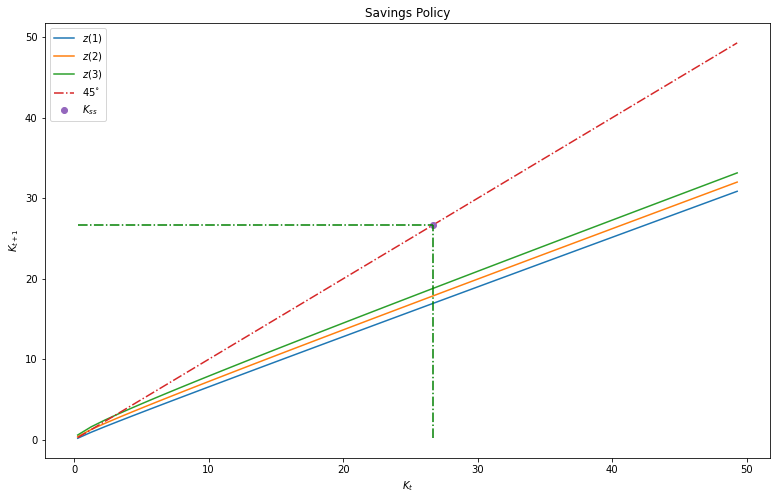

In [39]:
fig = plt.figure(facecolor='white',figsize=(13,8))
for z in range(Z.size):
    plt.plot(X, kpolicy[:,z])
plt.plot(X,X,'-.', kss, kss, 'o')
plt.plot(np.tile(kss,5), np.linspace(kmin, kss, 5), '-.g') # Dash-dot lines (y-axis)
plt.plot(np.linspace(kmin, kss, 5), np.tile(kss,5), '-.g') # Dash-dot lines (x-axis)
plt.xlabel('$K_{t}$')
plt.ylabel('$K_{t+1}$')
plt.title('Savings Policy')
plt.legend(['$z(1)$', '$z(2)$', '$z(3)$', '$45^{\circ}$', '$K_{ss}$'], loc=0)
plt.show()

The value function $V = \lim_{n \rightarrow \infty}W_{n}$:

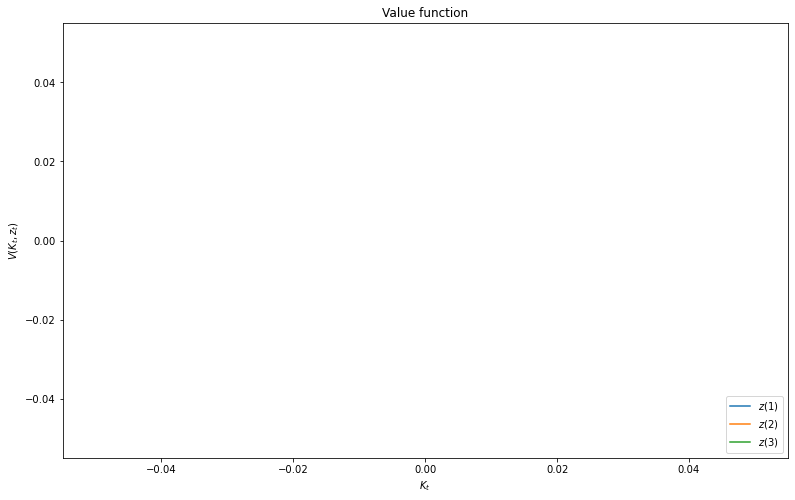

In [40]:
# Plot numerical approximation of the value function
fig = plt.figure(facecolor='white',figsize=(13,8))
for z in range(Z.size):
    plt.plot(X, W_new[:,z])
plt.xlabel('$K_{t}$')
plt.ylabel('$V(K_{t},z_{t})$')
plt.legend(['$z(1)$', '$z(2)$', '$z(3)$'], loc=4)
plt.title('Value function')
plt.show()

#### Answer 3.5

Given the matrix **kpolicy** representing finite points of the function $g$'s value at each state in $X \times Z$, we now can use it to generate a sample time-series path (i.e., a realization or trajectory of the planner's optimal plan, given a sample path of the Markov chain shock to productivity $\{z_{t}\}_{t=0}^{T}$. Note the use of a continuous function (e.g., linear) interpolant to obtain values of $K$ not defined explicitly in **kpolicy**.

In [41]:
# Generate sample path for exogenous state
T = 120
T_burn_in = 1000 # For discarding effects of initial conditions
T_all = T + T_burn_in

# Generate sample path
z_sim = mclongtam(Z,P,mu,T_all)
#z_sim = z_sim[T_burn_in-1:-1]

var_name = [ '$Z_{t}$', '$K_{t}$', '$C_{t}$', '$Y_{t}$' ]
N_vars = len(var_name)

# Data collector
data_sim = np.zeros((T_all,N_vars))
data_sim[:,0] = z_sim
k_initial = kss
data_sim[0,1] = k_initial

# Recursive data generation
for t in range(T_all-1):
    # Current observed states
    z = data_sim[t,0]
    k = data_sim[t,1]
    index_z = Z.tolist().index(z)
    # Given control function, next period endogenous state
    knext = np.interp(k, X, kpolicy[:,index_z])
    data_sim[t+1,1] = knext
    c = TotalResource(k, z, ALPHA, DELTA) - knext
    data_sim[t,2] = c
    y = TotalResource(k, z, ALPHA, DELTA) - (1-DELTA)*k
    data_sim[t,3] = y

# Remove last element (isempty for C and Y)
data_sim = data_sim[T_burn_in-2:-2,:]
# Convert numpy array into Python list
data_sim = (data_sim.T).tolist()

Let's plot the simulated time series data:

/var/folders/jj/c3rnssjx7dnb2tt1t9xy4vk80000gn/T/ipykernel_19512/2838912026.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows, ncols, index+1)
/var/folders/jj/c3rnssjx7dnb2tt1t9xy4vk80000gn/T/ipykernel_19512/2838912026.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows, ncols, index+1)
/var/folders/jj/c3rnssjx7dnb2tt1t9xy4vk80000gn/T/ipykernel_19512/2838912026.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows, ncols, index+1)
/var/folders/jj/c3rnssjx7dnb2tt1t9xy4vk80000gn/T/ipykernel_19512/2838912026.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element positi

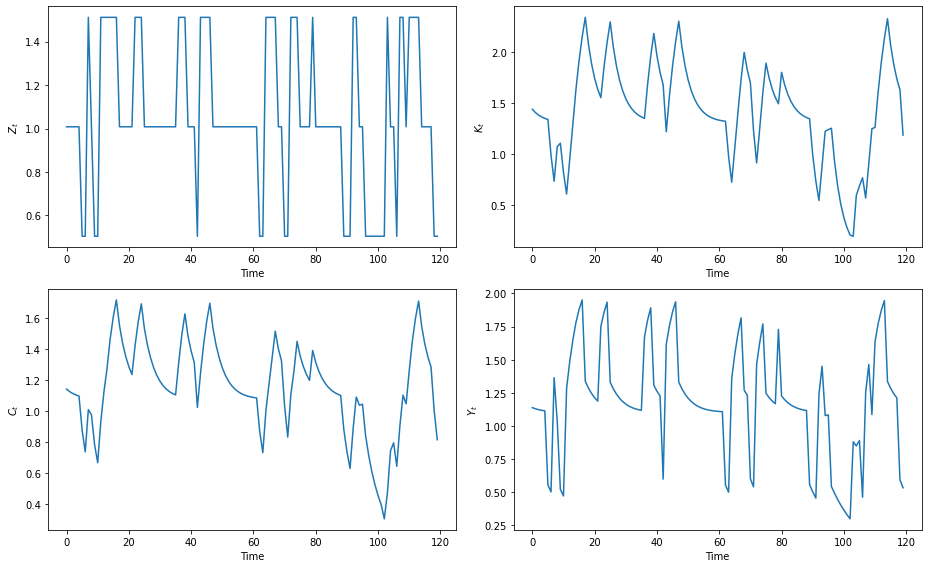

In [42]:
# Time domain 
date = np.arange(T)
# Set dimension for auto subplotting
ncols = 2
nrows = (N_vars + np.mod(N_vars, ncols)) / ncols

# Plot synthetic time series
fig = plt.figure(facecolor='white',figsize=(13,8))
for index, series in enumerate(data_sim):
    plt.subplot(nrows, ncols, index+1)
    plt.plot(date, series)
    plt.xlabel('Time')
    plt.ylabel(var_name[index])
    plt.tight_layout()

plt.show()

Another neat way to understand how these synthetic time series data were generated is as follows. Remember we've already got the policy function $(K,z) \mapsto g(K,z)$ as represented by the matrix **kpolicy** in the Python program. Now we'll superimpose the time series $\{K_{t}\}_{t=0}^{T}$ onto the phase diagram (which we plotted earlier) in $(K_{t}, K_{t+1})$-space.

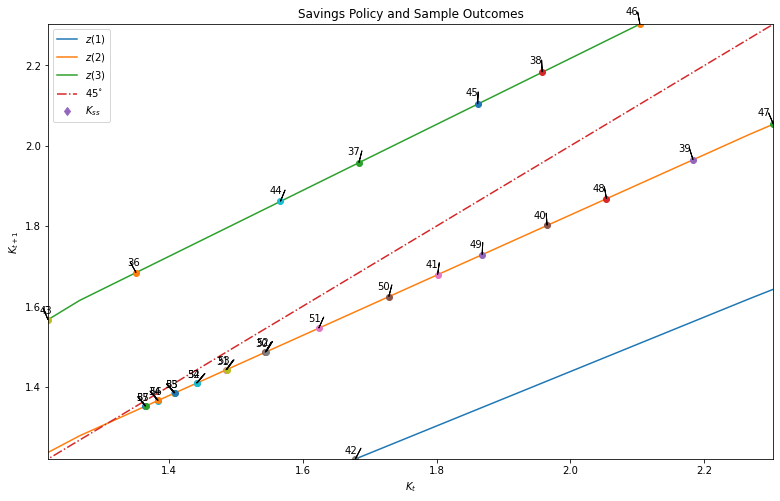

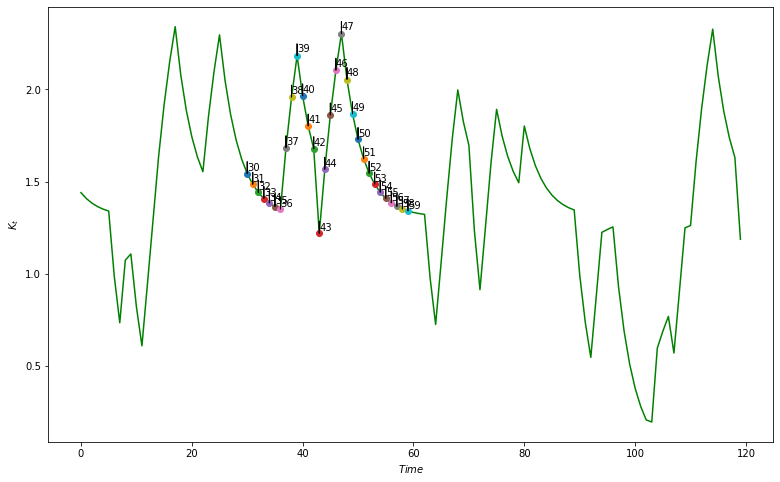

In [43]:
# Extract subsample---we don't like a too cluttered picture
T_subsample = 30
t_start = len(date)//4
k_sim = data_sim[var_name.index('$K_{t}$')]
date_subsample = range(t_start, t_start+T_subsample)
k_sub = k_sim[t_start: t_start+T_subsample]

# Plot capital policy function again
fig = plt.figure(facecolor='white',figsize=(13,8))
ax = plt.axes(xlim=(min(k_sub), max(k_sub)), ylim=(min(k_sub), max(k_sub)))
for z in range(Z.size):
    plt.plot(X, kpolicy[:,z])
plt.plot(X,X,'-.', kss, kss, 'd')
plt.plot(np.tile(kss,5), np.linspace(kmin, kss, 5), '-.g') # Dash-dot lines (y-axis)
plt.plot(np.linspace(kmin, kss, 5), np.tile(kss,5), '-.g') # Dash-dot lines (x-axis)
plt.xlabel('$K_{t}$')
plt.ylabel('$K_{t+1}$')
plt.title('Savings Policy and Sample Outcomes')
plt.legend(['$z(1)$', '$z(2)$', '$z(3)$', '$45^{\circ}$', '$K_{ss}$'], loc=0) 

# Now plot the sample paths in the same diagram
for t, ts in enumerate(date_subsample[0:-2]):
    plt.plot(k_sub[t], k_sub[t+1],'o')
    if T_subsample <= 50:
        plt.annotate(str(ts), xy=(k_sub[t], k_sub[t+1]), xytext=(k_sub[t]*0.99, k_sub[t+1]*1.01),
                        arrowprops=dict(facecolor='black', width = 0.01, shrink=0.05, headwidth=0.05))


# Time series subsample
fig = plt.figure(facecolor='white',figsize=(13,8))
plt.plot(date, k_sim, '-g')
for t, ts in enumerate(date_subsample):
    plt.plot(ts, k_sub[t],'o')
    if T_subsample <= 50:
        plt.annotate(str(ts), xy=(ts, k_sub[t]), xytext=(ts, k_sub[t]*1.01),
                        arrowprops=dict(facecolor='black', width = 0.01, shrink=0.05, headwidth=0.05))
plt.ylabel('$K_{t}$')
plt.xlabel('$Time$')        
        
plt.show()

#### Answer 3.6

This is a neoclassical economy where it satisfies the sufficient conditions for FWTs to hold. From the FWT2 we know that the allocations simulated above are equivalent to that of the competitive equilibrium allocations. Given allocations, we can compute the implied RCE prices for labor and capital:

In [44]:
def RCEPricing(k,z,ALPHA):
    T = len(k)
    w = [ (1-ALPHA)*z[t]*k[t]**(ALPHA) for t in range(T) ]
    r = [ (ALPHA)*z[t]*k[t]**(ALPHA-1) for t in range(T) ]
    return w, r

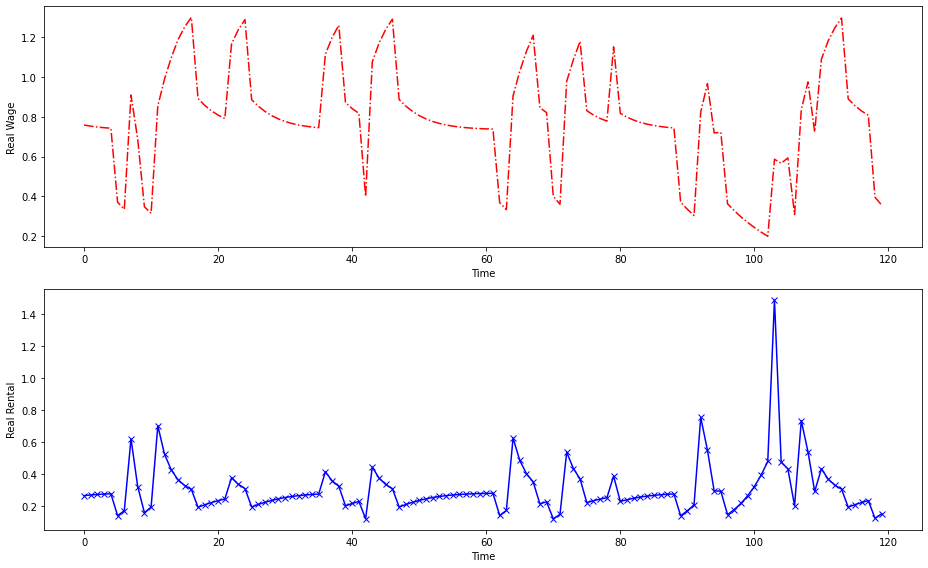

In [45]:
w_sim, r_sim = RCEPricing(data_sim[1],data_sim[0],ALPHA)
# Plot synthetic time series
fig = plt.figure(facecolor='white',figsize=(13,8))
plt.subplot(2,1,1)
plt.plot(date, w_sim, '-.r')
plt.xlabel('Time')
plt.ylabel('Real Wage')
plt.subplot(2,1,2)
plt.plot(date, r_sim, '-xb')
plt.xlabel('Time')
plt.ylabel('Real Rental')
plt.tight_layout()

plt.show()

## Exercise 4 (Homework)

*Incomplete markets agent's DP problem*. This exercise is actually a component of a class of incomplete-asset-markets, ex-post heterogeneous agent models due originally to Bewley, and then applied by S. Rao Aiyagari (inequality and the problem of over-saving, 1992, Quarterly J. Econ.) and Mark Huggett (asset pricing risk-free-rate puzzle; 1991, J. Econ Dynamics and Control).

Consider the asset (state) space of an agent called Amelia: $X := [ a_{min}, a_{max} ] \subset \mathbb{R}$. The endowment (state) space is $Z := \{ z_{L}, z_{H} \}$, where $z_{H} > z_{L}$. The consumer's Bernoulli utility function is $U: X \times Z \rightarrow \mathbb{R}$. Consider a fixed market (relative) price $q$ for an asset that delivers a for-sure unit of consumption good in one period. Amelia's current holding of the asset is $a_{t}$ units, and, her next-period asset choice is $a_{t+1}$. Let $x :=: x_{t}$ and $x_{+1} :=: x_{t+1}$ for any date $t$. Her current endownment realization is $z_{t}$. Her current consumption choice is $c_{t}$. Her budget constraint at any date, given any observed state $(a,z)$ is

$$
    c + qa_{+1} \leq a + z.
$$

Her total lifetime payoff is 
$$
\mathbb{E}\left\{ \sum_{t=0}^{\infty}\beta^{t}  U\left(c_{t}\right) | (a_{0},z_{0})\right\}.
$$ 





She faces an (ad-hoc) borrowing limit:
$$
a \geq a_{min}
$$

1. Prove that there is a unique value function solving Amelia's optimization problem.

2. Argue that her optimal strategy would also be unique.

3. Now, use the specification below to solve Amelia's problem. (*Huh?* Go find her value and policy functions.)

    * $U(c) = \frac{c^{1-\theta}}{1-\theta}$, $\theta = 1.5$
    
    * $q = 1.0129$
    
    * $a_{min} = -2.0$, $a_{max} = 6.0$
    
    * $z_{H} = 1.0$, $z_{L} = 0.1$
    
    * $z_{i}$, $i \in \{L, H\}$, is governed by an initial distribution on $Z$ and a Markov matrix
        $$P = \left[ \begin{matrix} 0.5 & 0.5 \\ 0.075 & 0.925 \end{matrix} \right]$$

4. Now simulate a sample trajectory of Amelia's optimal saving problem, for a sample length $T = 2000$.

5. Given the sample path you just computed, plot its long run distribution.

## Exercise 5 (Homework)

Do Question 1 from the 2015 Final Exam.

## Exercise 6 (Homework)

Do Question 5 from the 2015 Final Exam.